### 2021_10_25_4

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns      # seaborn은 matplotlib보다 간단하게 사용 가능
import os
for dirname, _, filenames in os.walk('../CSV/bike-sharing-demand/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



../CSV/bike-sharing-demand/sampleSubmission.csv
../CSV/bike-sharing-demand/test.csv
../CSV/bike-sharing-demand/pre_sub.csv
../CSV/bike-sharing-demand/train.csv


In [2]:
train = pd.read_csv("../CSV/bike-sharing-demand/train.csv",parse_dates=['datetime'])
test = pd.read_csv("../CSV/bike-sharing-demand/test.csv",parse_dates=['datetime'])
sub = pd.read_csv("../CSV/bike-sharing-demand/sampleSubmission.csv")

print("train shape : {}".format(train.shape))
print("test shape : {}".format(test.shape))
print("sub shape : {}".format(sub.shape))

train shape : (10886, 12)
test shape : (6493, 9)
sub shape : (6493, 2)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

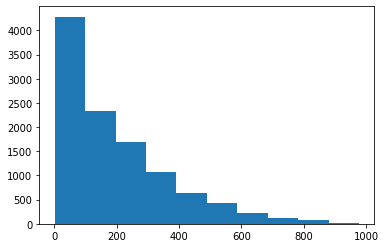

In [6]:
plt.hist(train["count"])

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

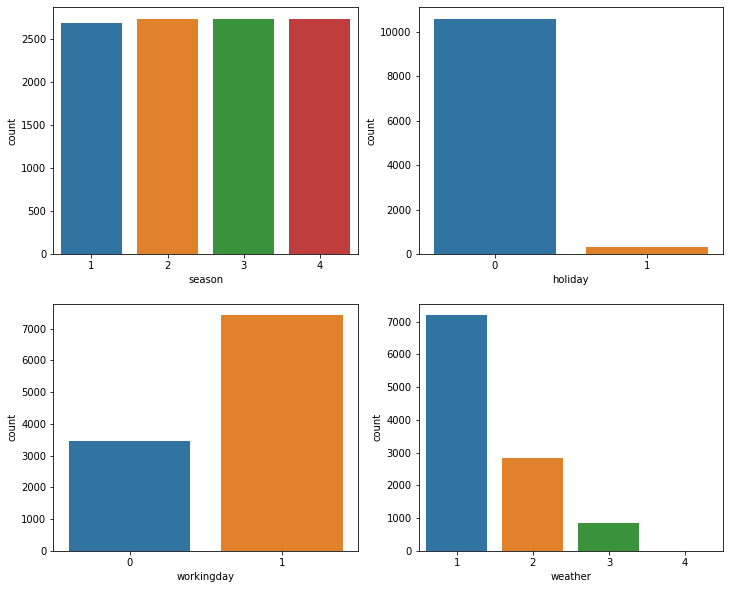

In [10]:
col_names = ["season", "holiday", "workingday", "weather"]
i = 0
plt.figure(figsize = (12, 10))  # 전체 그래프의 크기 지정

for name in col_names :     # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i += 1                  # 숫자를 1씩 증가.
    plt.subplot(2, 2, i)    # 2행 2열에 i번째 그래프 선택
    sns.countplot(name, data = train)  # i번째 그래프에 sns.countplot를 그리겠다.

plt.show()   # 주피터에서 보여주지만, 다른곳(editor, pycharm)에서는 이걸 실행시켜야 한다. 

### 수치형 데이터 선택

In [11]:
### temp, atemp, humidity, windspeed

num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

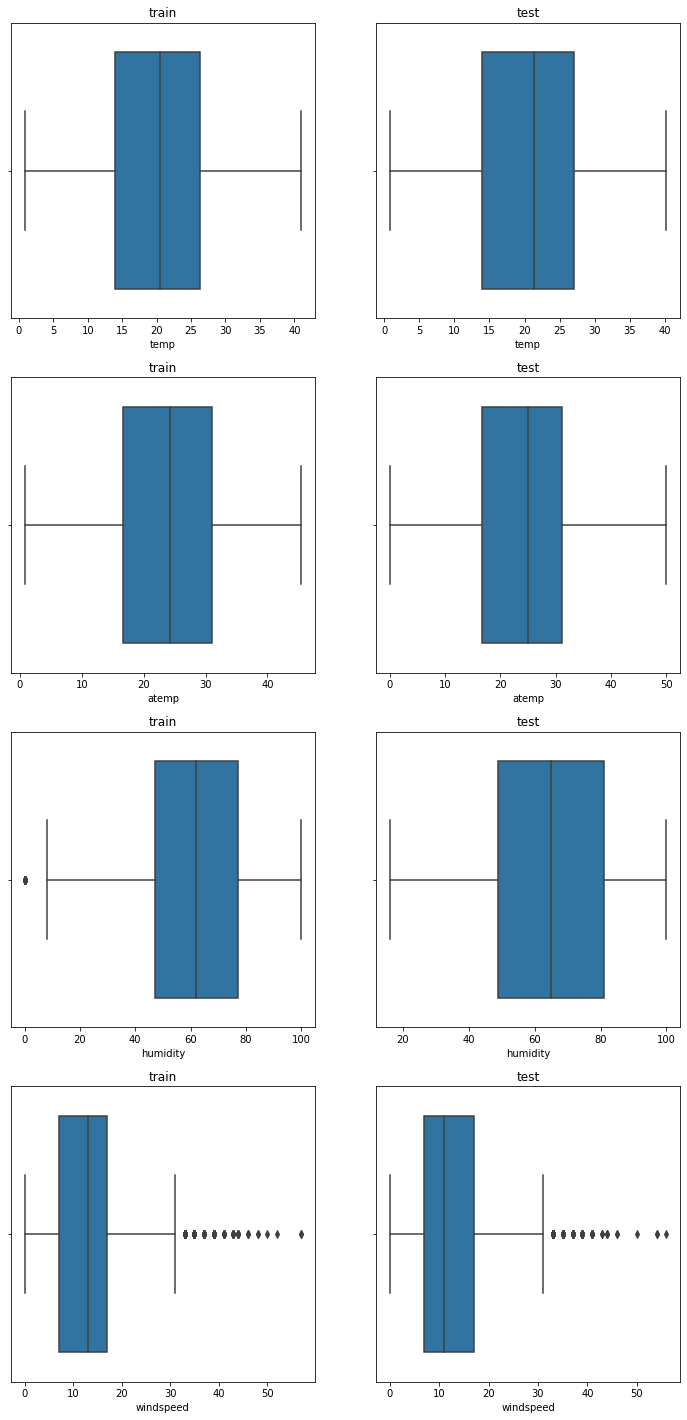

In [12]:
# par(mfrow=c(2,2)) -> R

i = 0
plt.figure(figsize=(12,25))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("train")
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(x=name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("test")
plt.show() 

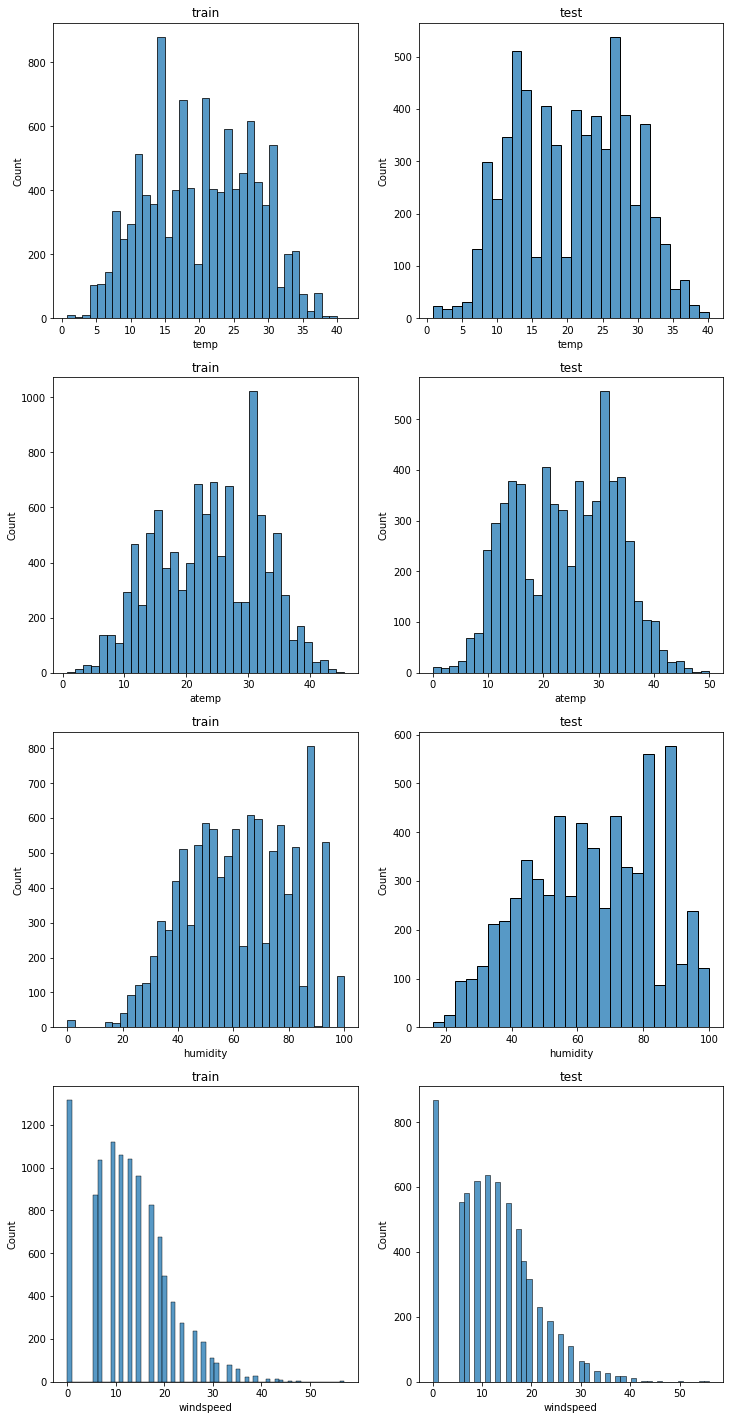

In [15]:
i = 0
plt.figure(figsize=(12,25))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=train)  # i번째 그래프에 sns.histplot를 그리겠다.
    plt.title("train")
    
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=test)  # i번째 그래프에 sns.histplot를 그리겠다.
    plt.title("test")
plt.show() 

In [17]:
new_train = train.copy() # 데이터 백업
new_test = test.copy()
new_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [18]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### 파생변수

In [30]:
new_train["year"] = new_train["datetime"].dt.year
new_train["month"] = new_train["datetime"].dt.month
new_train["day"] = new_train["datetime"].dt.day
new_train["hour"] = new_train["datetime"].dt.hour
new_train["minute"] = new_train["datetime"].dt.minute
new_train["second"] = new_train["datetime"].dt.second
new_train.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yeaer,month,day,hour,minute,second,year
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2012
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0,2012


In [35]:
new_test["year"] = new_test["datetime"].dt.year
new_test["month"] = new_test["datetime"].dt.month
new_test["day"] = new_test["datetime"].dt.day
new_test["hour"] = new_test["datetime"].dt.hour
new_test["minute"] = new_test["datetime"].dt.minute
new_test["second"] = new_test["datetime"].dt.second
new_test.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,yeaer,month,day,hour,minute,second,year
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,2012
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,2012
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,2012,12,31,23,0,0,2012


<AxesSubplot:>

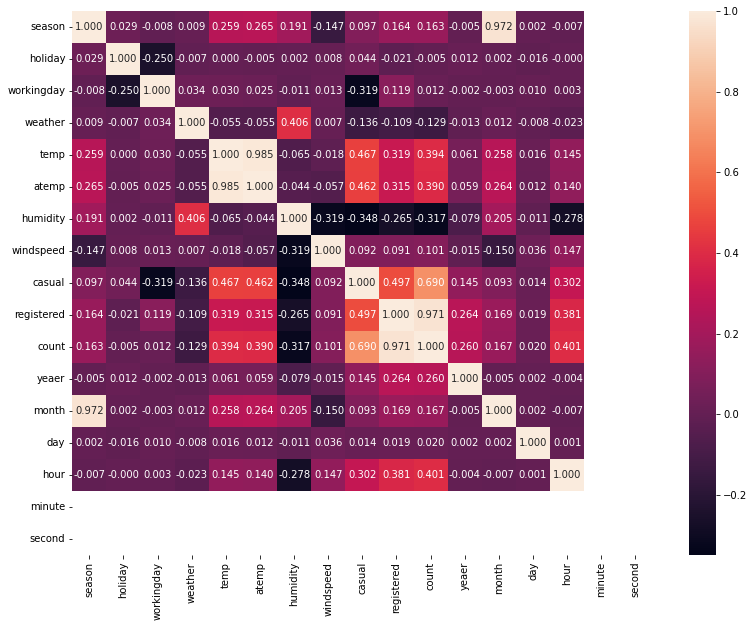

In [27]:
plt.figure(figsize = (13, 10))
val = new_train.corr()
sns.heatmap(val, annot = True, fmt = ".3f")

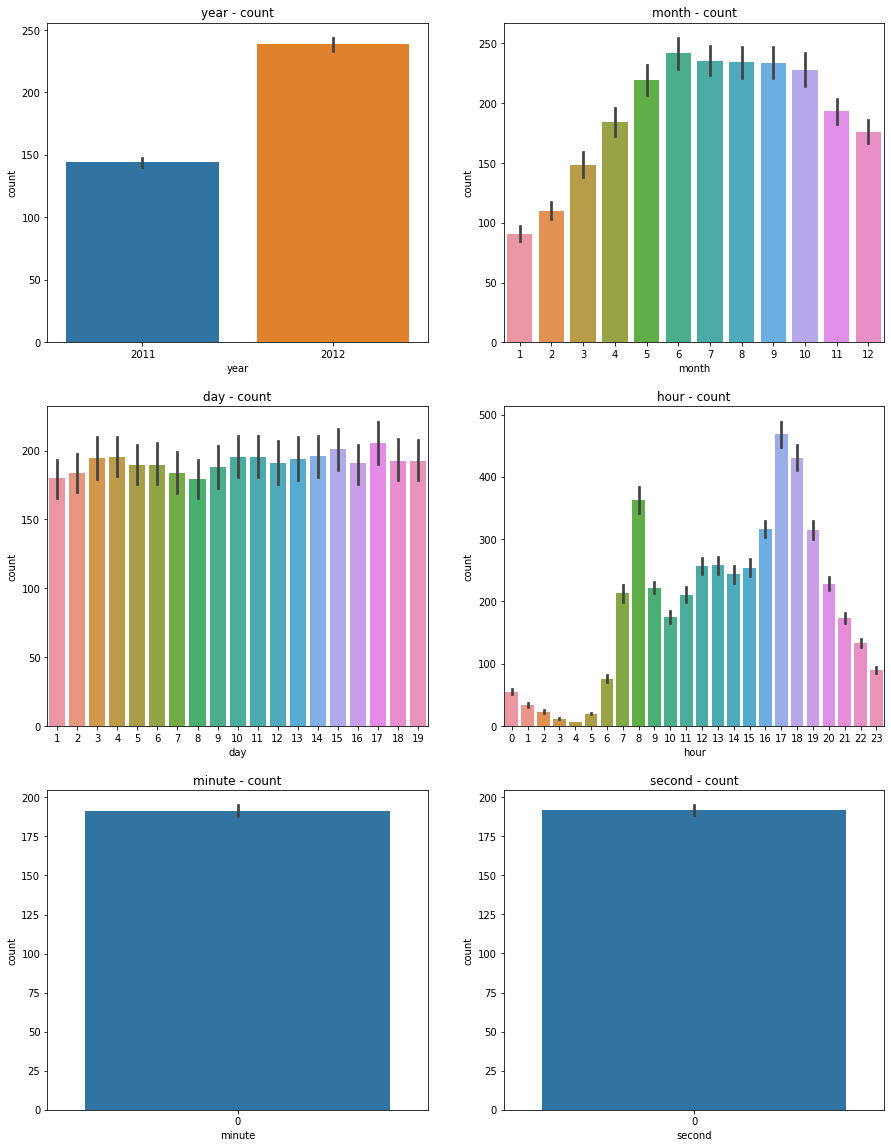

In [32]:
datetime_names = ["year", "month", "day", "hour", "minute", "second"]

plt.figure(figsize = (15, 20))
for idx, name in enumerate(datetime_names) :
    plt.subplot(3, 2, idx + 1)
    sns.barplot(x = name, y = "count", data = new_train)
    plt.title(name + " - count")

plt.show()

* 2011, 2012년도, 매년 증가하고 있다.
* 여름철에 더 많은 사람들이 이용한다.
* 1 ~ 19일 데이터이다.
* 새벽 시간대는 수요가 거의 없다.
* 출근 시간대와 퇴근 시간대에 수요가 많다.
* 분과 초는 데이터의 구분이 없다.(minute, second X)

### train, test 데이터 비교

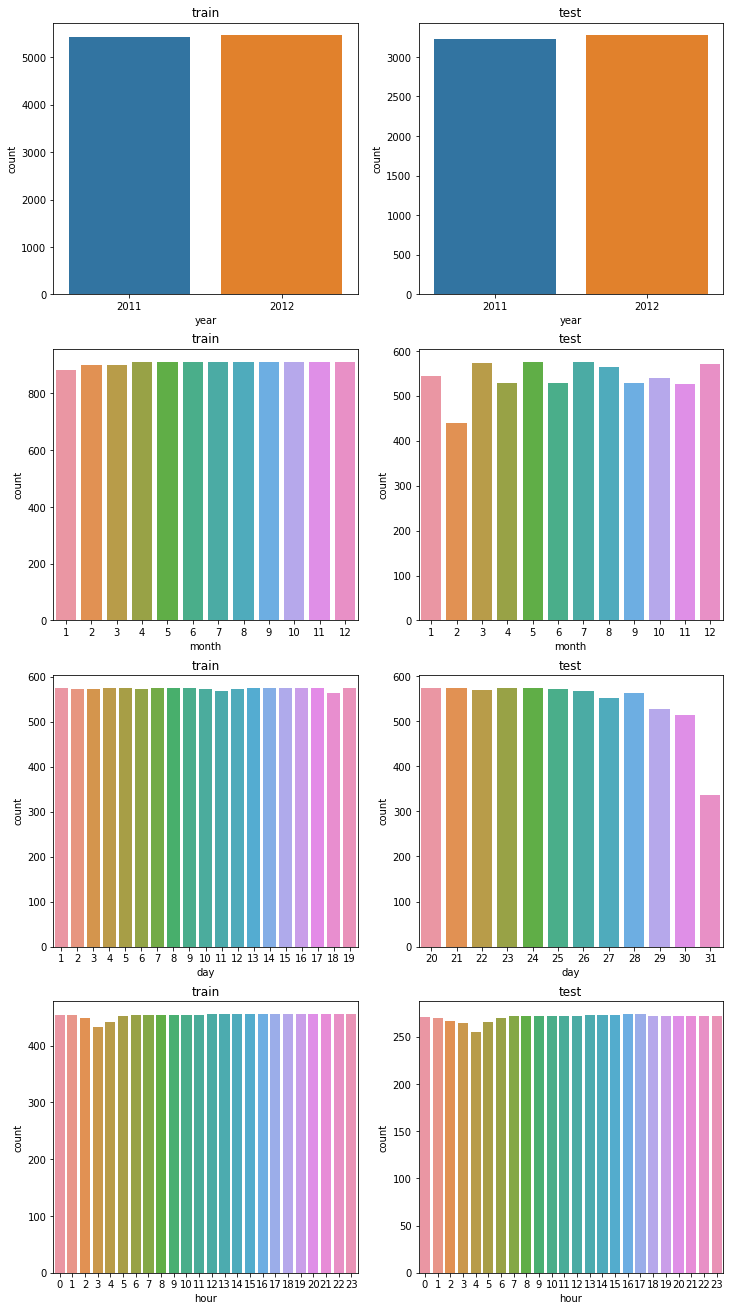

In [38]:
col_names = ['year','month','day','hour']

i = 0
plt.figure(figsize=(12,35))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
    i = i+1
    plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
    sns.countplot(x=name, data = new_train)
    plt.title('train')
  
    i = i+1
    plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
    sns.countplot(x=name, data = new_test)
    plt.title('test')

plt.show()

* 2, 4, 6월의 데이터가 약간 적다.
* 매월 31일의 데이터가 적다.

In [39]:
new_train["dayofweek"] = new_train["datetime"].dt.dayofweek
new_test["dayofweek"] = new_test["datetime"].dt.dayofweek

### 상관계수 분석

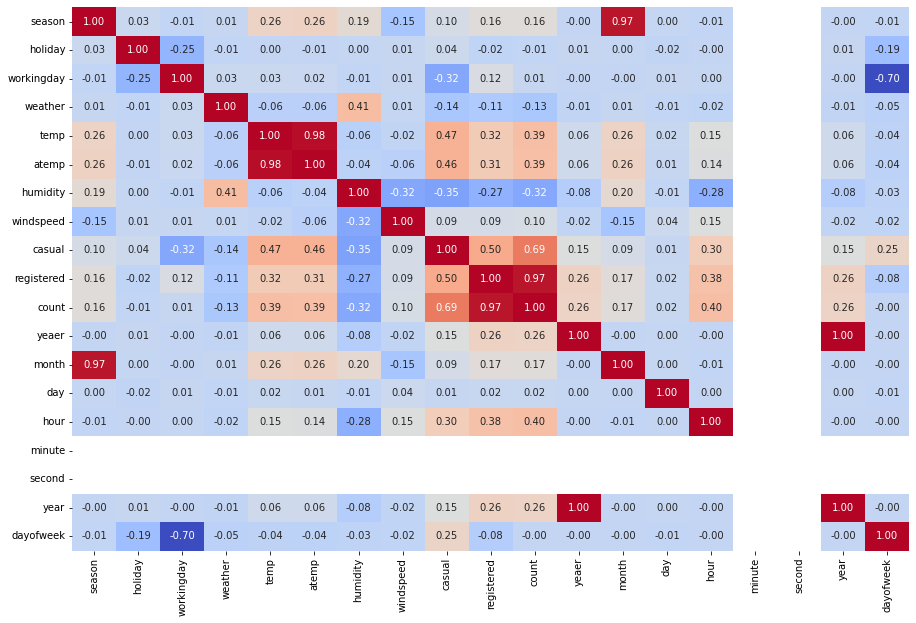

In [43]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_train.corr(), annot=True, fmt=".2f", 
                cmap="coolwarm", cbar=False)

In [44]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_train_all = new_train[feature_names]  # 학습용 데이터 변수 선택
X_test_all = new_test[feature_names]    # 테스트 데이터의 변수 선택 
print(X_train_all.head(3))

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   

   year  hour  dayofweek  
0  2011     0          5  
1  2011     1          5  
2  2011     2          5  


In [45]:
label_name = 'count'                 # 렌탈 대수 (종속변수)
y_train_all = new_train[label_name]        # 렌탈 대수 변수 값 선택

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_train_all, 
                                                    y_train_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
model = LinearRegression()     # 모델 객체 생성
model.fit(X_train, y_train)    # 모델 학습

# 정확도 확인
print("LinearRegression")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = DecisionTreeRegressor()  # 모델 객체 생성
model.fit(X_train, y_train)      # 모델 학습

# 정확도 확인
print("DecisionTreeRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = RandomForestRegressor(n_jobs = -1, random_state = 37)  # 모델 객체 생성
model.fit(X_train, y_train)                                    # 모델 학습

# 정확도 확인
print("RandomForestRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

model = GradientBoostingRegressor(random_state = 37)  # 모델 객체 생성.
model.fit(X_train, y_train)                           # 모델 학습

# 정확도 확인
print("GradientBoostingRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

LinearRegression
학습용 세트 정확도: 0.391
테스트 세트 정확도: 0.377

DecisionTreeRegressor
학습용 세트 정확도: 1.000
테스트 세트 정확도: 0.893

RandomForestRegressor
학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.946

GradientBoostingRegressor
학습용 세트 정확도: 0.860
테스트 세트 정확도: 0.849


### 최종모델
* 특징 추출
* 특징 선택
* 여러 모델 비교
* 최적 모델 선택 -> RandomForestRegressor

In [51]:
model = RandomForestRegressor(n_jobs = -1, random_state = 37)  # 모델 객체 생성
model.fit(X_train, y_train)                                    # 모델 학습 

# 정확도 확인
print("RandomForestRegressor")
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
print()

pred = model.predict(X_test_all)
pred[:10]

RandomForestRegressor
학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.946



array([ 11.75,   4.2 ,   4.78,   3.48,   2.77,   5.65,  37.05, 105.39,
       231.4 , 127.19])

### 제출 파일 생성

In [67]:
sub["count"] = pred
sub.loc[sub["count"] < 0, "count"] = 0
sub.to_csv("../CSV/bike-sharing-demand/03_sub.csv", index = False)

In [54]:
model.feature_importances_

array([0.03628539, 0.00232723, 0.03567138, 0.01622299, 0.08177621,
       0.03988315, 0.0316861 , 0.01059026, 0.08779102, 0.60955708,
       0.04820919])

In [55]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'hour', 'dayofweek'],
      dtype='object')

### 데이터 정규화

In [59]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [60]:
scaler = MinMaxScaler().fit(X_train_all)

nor_X_train_all = scaler.transform(X_train_all)
ex_X_train = PolynomialFeatures(degree = 2, 
                             include_bias = False).fit_transform(nor_X_train_all)

y_train_all = new_train['count']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(ex_X_train, 
                                                   y_train_all, 
                                                   test_size = 0.2,
                                                   random_state = 42)

In [62]:
model = RandomForestRegressor(n_jobs = -1, random_state = 37)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.950


In [63]:
nor_X_test_all = scaler.transform(X_test_all)
ex_X_test = PolynomialFeatures(degree = 2, 
                             include_bias = False).fit_transform(nor_X_test_all)

In [64]:
ex_X_test.shape

(6493, 77)

In [66]:
pred = model.predict(ex_X_test)
sub["count"] = pred
sub.loc[sub["count"] < 0, "count"] = 0
sub.to_csv("../CSV/bike-sharing-demand/04_sub.csv", index = False)